In [1]:
import pandas as pd
import numpy as np

%precision 3 : 출력을 3자리로 제한-주피털

In [2]:
%precision 3

'%.3f'

set_option('precision',3)- DataFrame의 출력을 소수점 3자리 이하로 제한

In [3]:
pd.set_option('precision',3)

In [4]:
data=pd.read_csv('ch2_scores_em.csv',index_col='student number')

In [5]:
data.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
scores =np.array(data['english'])[:10]

In [7]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [8]:
scores_df=pd.DataFrame({'score':scores},pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))

In [9]:
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [10]:
sum(scores)/len(scores)

55.0

In [11]:
np.mean(scores)

55.0

In [12]:
scores_df.mean()

score    55.0
dtype: float64

In [13]:
sorted_scores=np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [14]:
scores.sort()

In [15]:
scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [16]:
n=len(scores)
if n%2 == 0:
    m0 =scores[n//2 +1]
    m1 = scores[n//2]
    median = (m0 + m1)/2
else:
    median = scores[n//2+1]

median

57.5

In [17]:
# scores is np
np.median(scores)

56.5

In [18]:
# score_df is pd
scores_df.median()

score    56.5
dtype: float64

In [19]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [20]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [21]:
# indicator of deviation
mean=np.mean(scores)
deviation = scores-mean
deviation

array([-14., -13.,  -7.,  -6.,   1.,   2.,   3.,  10.,  10.,  14.])

In [22]:
deviation_df=pd.DataFrame({'deviation':deviation},pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
deviation_df

,deviation
student,
A,-14.0
B,-13.0
C,-7.0
D,-6.0
E,1.0
F,2.0
G,3.0
H,10.0
I,10.0


In [23]:
another_scores=[50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [24]:
another_deviation_df=pd.DataFrame({'deviation':another_deviation},
                                  pd.Index(['1','2','3','4','5','6','7','8','9','10'],name='deviation'))
another_deviation_df

,deviation
deviation,
1,-5.0
2,5.0
3,3.0
4,-1.0
5,-4.0
6,1.0
7,2.0
8,-2.0
9,-3.0


In [25]:
np.mean(deviation)

0.0

In [26]:
squar=another_deviation**2
squar.sum()/(len(squar)-1)

12.222222222222221

In [27]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-14.0
B,69,-13.0
C,56,-7.0
D,41,-6.0
E,57,1.0
F,48,2.0
G,65,3.0
H,49,10.0
I,65,10.0


In [28]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [29]:
summary_df.describe()

,score,deviation
count,10.000,10.000
mean,55.000,0.000
std,9.775,9.775
min,41.000,-14.000
25%,48.250,-6.750
50%,56.500,1.500
75%,63.250,8.250
max,69.000,14.000


In [30]:
squar2 = deviation**2
(squar2.sum()/(len(deviation)-1))**(0.5)

9.775252199076787

In [31]:
np.mean(deviation**2)

86.0

In [32]:
np.var(deviation)

86.0

In [33]:
scores_df.var()**0.5

score    9.775
dtype: float64

In [34]:
np.var(deviation)**(0.5)

9.273618495495704

In [35]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-14.0,196.0
B,69,-13.0,169.0
C,56,-7.0,49.0
D,41,-6.0,36.0
E,57,1.0,1.0
F,48,2.0,4.0
G,65,3.0,9.0
H,49,10.0,100.0
I,65,10.0,100.0


In [36]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [37]:
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [38]:
np.std(scores,ddof=0)

9.273618495495704

In [39]:
np.max(scores)-np.min(scores)

28

In [40]:
# 4분위수 percentile(variable,percent)
scores_1Q = np.percentile(scores,25)
scores_3Q = np.percentile(scores,75)
scores_IQR = scores_3Q - scores_1Q
scores_IQR

15.0

In [41]:
# std is sample standard deviation
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 2.3 정규화

In [42]:
z = (scores-np.mean(scores))/np.std(scores)
z

array([-1.51 , -1.402, -0.755, -0.647,  0.108,  0.216,  0.323,  1.078,
        1.078,  1.51 ])

In [43]:
print('{0:.3f} {1:.3f}'.format(np.mean(z),np.std(z,ddof=0)))

0.000 1.000


In [44]:
z = 50 +10*(scores-np.mean(scores))/np.std(scores)

In [45]:
z

array([34.903, 35.982, 42.452, 43.53 , 51.078, 52.157, 53.235, 60.783,
       60.783, 65.097])

In [46]:
scores_df['deviation value']=z
scores_df

,score,deviation value
student,,
A,42,34.903
B,69,35.982
C,56,42.452
D,41,43.530
E,57,51.078
F,48,52.157
G,65,53.235
H,49,60.783
I,65,60.783


## 2.4 1차원 시각화 

In [48]:
df=data

In [49]:
english_scores=np.array(df['english'])

pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 2.4.1 도수분포표

In [53]:
freq,num = np.histogram(english_scores,bins = 10, range=(0,100))

In [54]:
num

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [55]:
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [59]:
# why use f? 문자열 포매팅 f'문자열 {변수} 문자열'
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]

In [60]:
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [63]:
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,name='class'))

freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [85]:
class_vlaue = [(i+(i+10))// 2 for i in range(0,100,10)]
class_vlaue

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [86]:
rel_freq = freq/freq.sum()

In [87]:
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [88]:
# 누적도수 np.cumsum
cum_rel_freq = np.cumsum(rel_freq)

In [89]:
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [90]:
freq_dist_df['class value'] = class_vlaue
freq_dist_df['relative frequency'] = real_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq

In [91]:
freq_dist_df=freq_dist_df[['class value','frequency','relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [92]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

### 2.4.2 히스토그램

In [93]:
import matplotlib.pyplot as plt

In [94]:
%matplotlib inline

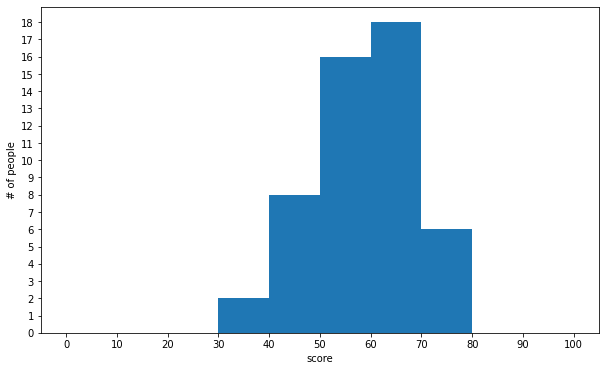

In [97]:
#컨버스 생성 및 가로 세로 지정
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

freq,_,_ = ax.hist(english_scores,bins = 10,range=(0,100))

ax.set_xlabel('score')
ax.set_ylabel('# of people') 
# x 축 눈금
ax.set_xticks(np.linspace(0,100,10+1))
# y 축 눈금
ax.set_yticks(np.arange(0,freq.max()+1))

# 시각화
plt.show()

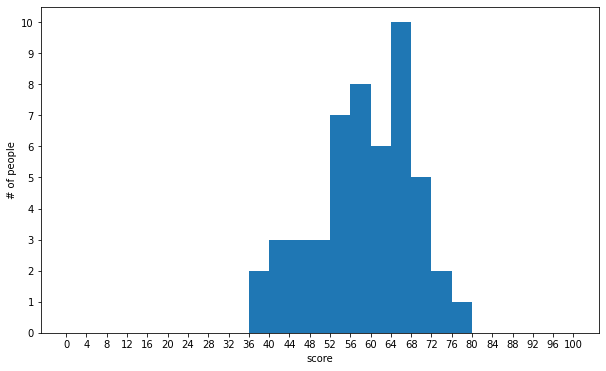

In [101]:
#컨버스 생성 및 가로 세로 지정
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

freq,_,_ = ax.hist(english_scores,bins = 25,range=(0,100))

ax.set_xlabel('score')
ax.set_ylabel('# of people') 
# x 축 눈금
ax.set_xticks(np.linspace(0,100,25+1))
# y 축 눈금
ax.set_yticks(np.arange(0,freq.max()+1))

# 시각화
plt.show()

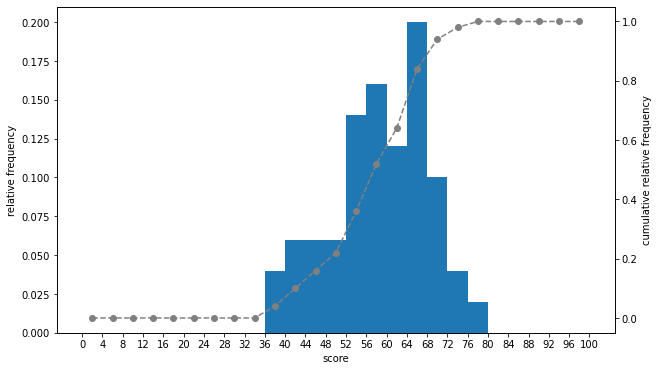

In [109]:
fig = plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)

ax2=ax1.twinx()

weights = np.ones_like(english_scores)/len(english_scores)
rel_freq,_,_ = ax1.hist(english_scores,bins = 25,range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_vlaue = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_vlaue,cum_rel_freq,ls='--',marker='o',color = 'gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency') 
# x 축 눈금
ax1.set_xticks(np.linspace(0,100,25+1))


# 시각화
plt.show()